
# Análisis Predictivo - Predicción del PIB

## Introducción

En este análisis, se busca predecir el Producto Interno Bruto (PIB) de diferentes países en función de diversas características económicas y demográficas. Las variables seleccionadas incluyen el **PIB per cápita**, **población**, **esperanza de vida**, **emisiones de CO2**, y el **porcentaje de exportaciones e importaciones** respecto al PIB.

El análisis se enfoca en comparar dos modelos predictivos:

1. **Regresión Lineal**: Un modelo básico de predicción que busca una relación lineal entre las variables.
2. **Random Forest**: Un modelo avanzado de machine learning basado en árboles de decisión, ideal para capturar relaciones no lineales.

Ambos modelos serán evaluados usando métricas como **RMSE** (Error Cuadrático Medio), **R²** (Coeficiente de Determinación) y **MAE** (Error Absoluto Medio). Estos modelos permitirán identificar cuál tiene un mejor desempeño en la predicción del PIB de los países a partir de las características seleccionadas.



## Objetivos y Métodos

### Objetivo

El objetivo de este análisis es construir y evaluar modelos predictivos para predecir el **PIB** de los países en función de variables económicas y demográficas. A través de dos modelos:

1. **Regresión Lineal**: Para encontrar una relación lineal entre las variables.
2. **Random Forest**: Para capturar relaciones no lineales y manejar la complejidad de las interacciones entre variables.

### Métodos

1. **Preparación de los Datos**: 
   - Eliminar valores nulos.
   - Normalizar las variables para mejorar la precisión de los modelos predictivos.
   
2. **Modelado Predictivo**:
   - **Regresión Lineal**: Entrenamiento de un modelo sencillo de regresión.
   - **Random Forest**: Entrenamiento de un modelo basado en múltiples árboles de decisión.

3. **Evaluación de los Modelos**:
   - Uso de **RMSE**, **R²** y **MAE** para comparar el desempeño de ambos modelos.
   - Visualización de las predicciones versus los valores reales para cada modelo.



## Preparación de los Datos

### Limpieza de Datos

Es esencial limpiar los datos antes de entrenar los modelos. Esto incluye:

1. **Eliminación de Valores Nulos**: Se eliminaron las filas con valores faltantes en las variables seleccionadas.
2. **Normalización/Estandarización**: Algunas variables, como el PIB o las emisiones de CO2, pueden tener rangos muy amplios. Por lo tanto, se estandarizaron las características para asegurarse de que todas las variables tengan el mismo peso en el modelo, especialmente para el modelo de **Regresión Lineal**.
3. **Variables Seleccionadas**: Se utilizaron las siguientes variables:
   - **GDP_per_capita_USD**: PIB per cápita.
   - **Population**: Población total.
   - **Life_exp**: Esperanza de vida.
   - **CO2_emissions**: Emisiones de CO2.
   - **Exports_percent_GDP**: Porcentaje de exportaciones respecto al PIB.
   - **Imports_percent_GDP**: Porcentaje de importaciones respecto al PIB.

Estas características se usaron para predecir el **PIB** (variable dependiente).


In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Cargar el dataset
file_path = './output/WDI_Complete_Analysis_PowerBI.csv'
dataset = pd.read_csv(file_path)

# Variables y objetivo
features = ['GDP_per_capita_USD', 'Population', 'Life_exp', 'CO2_emissions', 'Exports_percent_GDP', 'Imports_percent_GDP']
target = 'GDP'

# Filtrar los datos y eliminar valores nulos
dataset_cleaned = dataset[features + [target]].dropna()

# Separar las variables predictoras (X) y la variable dependiente (y)
X = dataset_cleaned[features]
y = dataset_cleaned[target]

# Normalizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjunto de entrenamiento (80%) y conjunto de prueba (20%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Verificar dimensiones de los datos
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((5481, 6), (1371, 6), (5481,), (1371,))


## Selección del Modelo Predictivo

### 1. **Regresión Lineal**

La **Regresión Lineal** es un modelo predictivo que asume que existe una relación lineal entre las variables independientes y la variable dependiente (en este caso, el PIB). Este modelo es ideal cuando las relaciones entre las variables son simples y lineales.

### 2. **Random Forest**

El **Random Forest** es un modelo de machine learning más avanzado que utiliza múltiples árboles de decisión para predecir el resultado. Este modelo es más flexible y puede manejar relaciones no lineales entre las variables, lo que lo hace adecuado para datos más complejos.


In [2]:

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Entrenar el modelo de Regresión Lineal
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Evaluar el modelo de Regresión Lineal
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = mse_linear ** 0.5  # Calcular RMSE manualmente
r2_linear = r2_score(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)

# Entrenar el modelo de Random Forest
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)

# Evaluar el modelo Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5  # Calcular RMSE manualmente
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# Resultados de evaluación
evaluation_results = {
    'Modelo': ['Regresión Lineal', 'Random Forest'],
    'RMSE': [rmse_linear, rmse_rf],
    'R²': [r2_linear, r2_rf],
    'MAE': [mae_linear, mae_rf]
}

evaluation_df = pd.DataFrame(evaluation_results)

# Mostrar las métricas
evaluation_df


,Modelo,RMSE,R²,MAE
0,Regresión Lineal,1.535040e-11,1.00000,1.051750e-11
1,Random Forest,7.863955e+01,0.99998,1.405127e+01



## Visualización de Resultados

Los siguientes gráficos comparan las predicciones de cada modelo con los valores reales del conjunto de prueba. Además, comparamos las métricas de evaluación (RMSE, R², MAE) de ambos modelos para determinar cuál es el más preciso.

### Comparación de Predicciones vs Reales


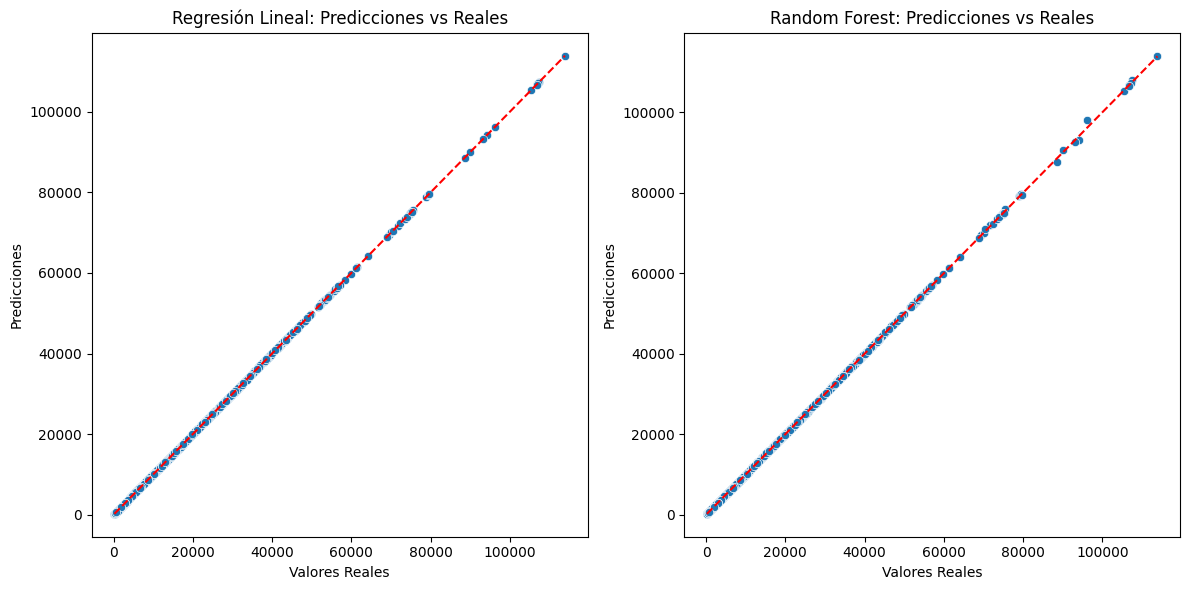

In [3]:

import matplotlib.pyplot as plt
import seaborn as sns

# Visualización de las predicciones vs valores reales
plt.figure(figsize=(12, 6))

# Regresión Lineal
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_linear)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Regresión Lineal: Predicciones vs Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')

# Random Forest
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Random Forest: Predicciones vs Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')

plt.tight_layout()
plt.show()

# Visualización de la evaluación comparativa de modelos
import plotly.express as px
fig = px.bar(evaluation_df, x='Modelo', y=['RMSE', 'R²', 'MAE'], 
             title='Evaluación Comparativa de Modelos Predictivos', 
             labels={'value': 'Valor', 'Modelo': 'Modelo Predictivo'},
             barmode='group')
fig.show()
